In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from dask.delayed import delayed
import matplotlib.pyplot as plt

In [2]:
src='data/dataset.parquet.gz'
df = pd.read_parquet(src)

In [3]:
df.columns

Index(['date', 'num_claims', 'cit_received', 'cit_made', 'originality',
       'generality', 'wipo_field_id', 'wipo_sector_id', 'external',
       'far_external', 'pagerank'],
      dtype='object')

In [4]:
df["pagerank"] = df.pagerank.astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9677417 entries, 000004 to pctus9926473
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   date            float64 
 1   num_claims      float64 
 2   cit_received    float64 
 3   cit_made        float64 
 4   originality     float64 
 5   generality      float64 
 6   wipo_field_id   category
 7   wipo_sector_id  category
 8   external        float64 
 9   far_external    float64 
 10  pagerank        float64 
dtypes: category(2), float64(9)
memory usage: 756.8+ MB


In [6]:
df.describe()

,date,num_claims,cit_received,cit_made,originality,generality,external,far_external,pagerank
count,7.430873e+06,7.430873e+06,9.677415e+06,6.993129e+06,6.324082e+06,7.097566e+06,5.757066e+06,5.757066e+06,9.417510e+06
mean,2.004755e+03,1.424143e+01,1.147255e+01,1.587624e+01,1.779464e-01,1.799363e-01,7.521218e+00,1.043347e+01,1.061845e-07
std,1.185321e+01,1.164018e+01,3.411512e+01,5.434047e+01,2.239259e-01,2.280400e-01,3.323117e+01,3.939346e+01,2.625707e-07
min,1.976000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.881099e-08
25%,1.997000e+03,6.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.156010e-08
50%,2.008000e+03,1.300000e+01,3.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,5.521052e-08
75%,2.015000e+03,2.000000e+01,1.100000e+01,1.300000e+01,3.750000e-01,4.062500e-01,6.000000e+00,9.000000e+00,9.436058e-08
max,2.020000e+03,8.870000e+02,4.677000e+03,5.841000e+03,8.000000e-01,8.000000e-01,4.310000e+03,4.376000e+03,8.805479e-05


In [7]:
df.dropna(inplace=True)

CPU times: user 164 ms, sys: 12.4 ms, total: 176 ms
Wall time: 202 ms


<AxesSubplot:>

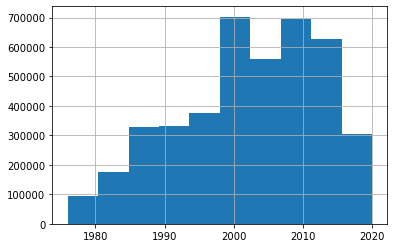

In [8]:
%%time
df['date'].hist()

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'num_claims'}>,
        <AxesSubplot:title={'center':'cit_received'}>],
       [<AxesSubplot:title={'center':'cit_made'}>,
        <AxesSubplot:title={'center':'originality'}>,
        <AxesSubplot:title={'center':'generality'}>],
       [<AxesSubplot:title={'center':'external'}>,
        <AxesSubplot:title={'center':'far_external'}>,
        <AxesSubplot:title={'center':'pagerank'}>]], dtype=object)

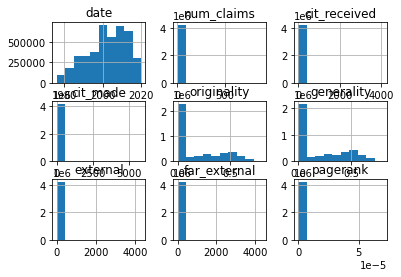

In [9]:
df.hist()

In [10]:
df.isna().sum()

date              0
num_claims        0
cit_received      0
cit_made          0
originality       0
generality        0
wipo_field_id     0
wipo_sector_id    0
external          0
far_external      0
pagerank          0
dtype: int64

<AxesSubplot:>

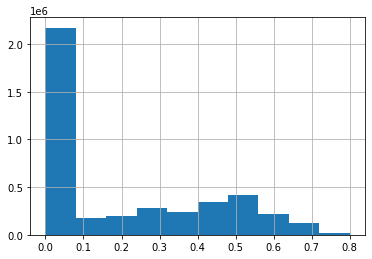

In [11]:
df.generality.hist()

<AxesSubplot:>

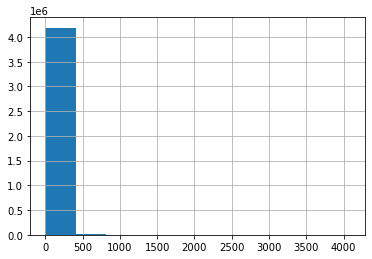

In [12]:
df.cit_received.hist()

<AxesSubplot:xlabel='generality', ylabel='pagerank'>

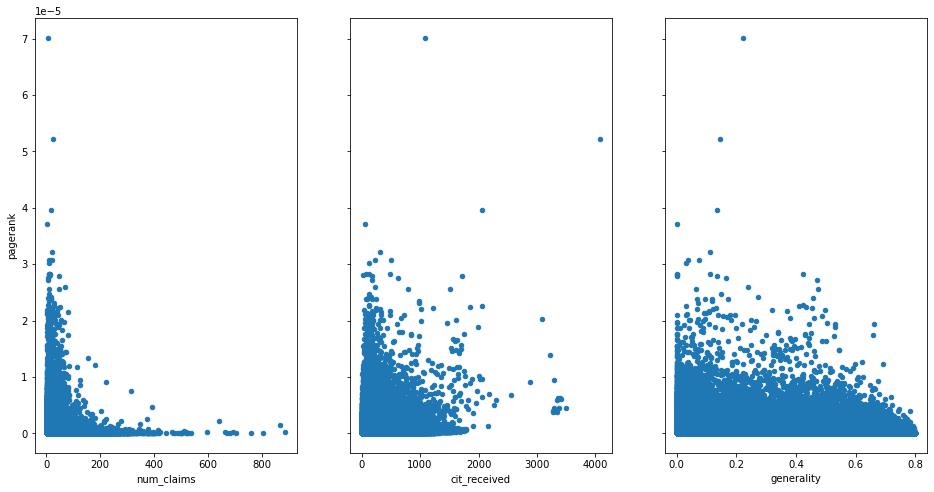

In [13]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='num_claims', y='pagerank', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='cit_received', y='pagerank', ax=axs[1])
df.plot(kind='scatter', x='generality', y='pagerank', ax=axs[2])

In [14]:
# pagerank == 0 means cit received==0
# check
(df.pagerank==df.cit_received).count()

4196801

In [15]:
df=df[df.pagerank>0]


<AxesSubplot:xlabel='generality', ylabel='pagerank'>

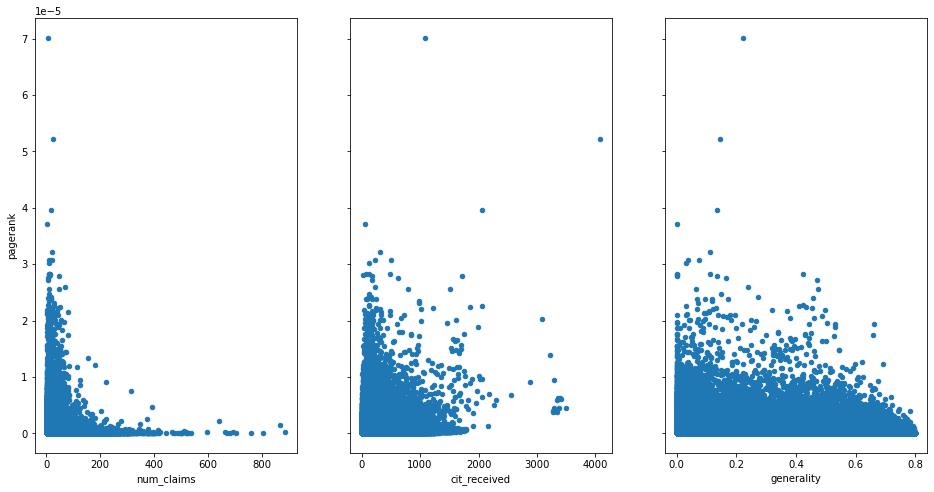

In [16]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='num_claims', y='pagerank', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='cit_received', y='pagerank', ax=axs[1])
df.plot(kind='scatter', x='generality', y='pagerank', ax=axs[2])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4196801 entries, 10000116 to 9999980
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   date            float64 
 1   num_claims      float64 
 2   cit_received    float64 
 3   cit_made        float64 
 4   originality     float64 
 5   generality      float64 
 6   wipo_field_id   category
 7   wipo_sector_id  category
 8   external        float64 
 9   far_external    float64 
 10  pagerank        float64 
dtypes: category(2), float64(9)
memory usage: 328.2+ MB


In [18]:
df['log_pagerank']=np.log(df['pagerank'])

<AxesSubplot:xlabel='generality', ylabel='log_pagerank'>

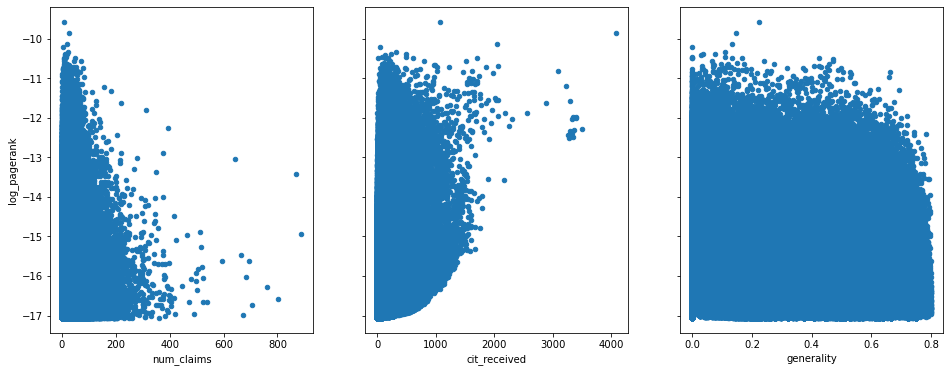

In [19]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='num_claims', y='log_pagerank', ax=axs[0], figsize=(16, 6))
df.plot(kind='scatter', x='cit_received', y='log_pagerank', ax=axs[1])
df.plot(kind='scatter', x='generality', y='log_pagerank', ax=axs[2])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4196801 entries, 10000116 to 9999980
Data columns (total 12 columns):
 #   Column          Dtype   
---  ------          -----   
 0   date            float64 
 1   num_claims      float64 
 2   cit_received    float64 
 3   cit_made        float64 
 4   originality     float64 
 5   generality      float64 
 6   wipo_field_id   category
 7   wipo_sector_id  category
 8   external        float64 
 9   far_external    float64 
 10  pagerank        float64 
 11  log_pagerank    float64 
dtypes: category(2), float64(10)
memory usage: 360.2+ MB


In [21]:
df['log_cit_received']=np.log(df['cit_received'])

<AxesSubplot:xlabel='generality', ylabel='log_pagerank'>

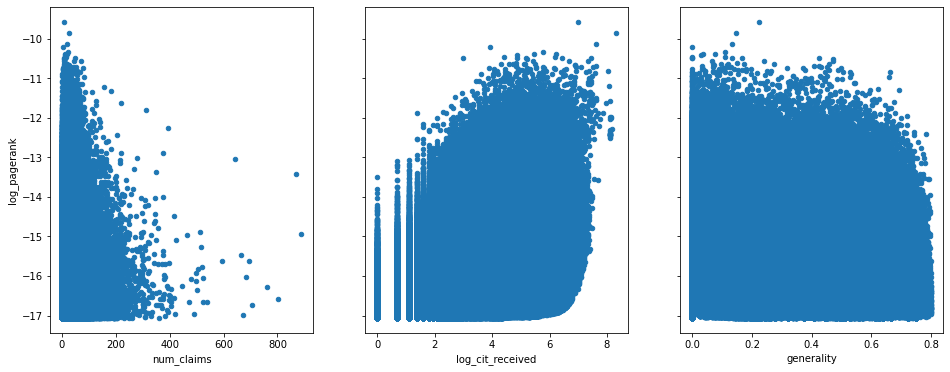

In [22]:
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='num_claims', y='log_pagerank', ax=axs[0], figsize=(16, 6))
df.plot(kind='scatter', x='log_cit_received', y='log_pagerank', ax=axs[1])
df.plot(kind='scatter', x='generality', y='log_pagerank', ax=axs[2])

In [23]:
df.columns

Index(['date', 'num_claims', 'cit_received', 'cit_made', 'originality',
       'generality', 'wipo_field_id', 'wipo_sector_id', 'external',
       'far_external', 'pagerank', 'log_pagerank', 'log_cit_received'],
      dtype='object')

In [26]:
df['cit_received'].nlargest(15)

index
4683195    4083.0
7674650    3498.0
5731856    3402.0
7061014    3391.0
7297977    3371.0
6727522    3354.0
7732819    3340.0
6563174    3335.0
7282782    3324.0
7064346    3320.0
7402506    3309.0
7323356    3302.0
5744864    3297.0
7211825    3296.0
7462862    3295.0
Name: cit_received, dtype: float64